In [422]:
# Project: Wrangle and Analyze Data - We Rate Dogs
# 2018
# By Kevin

In [423]:
# Project Citations
# Twitter data taken from Udacity and https://twitter.com/dog_rates

# Gathering Data

## Importing Python Packages and Initial Files

In [424]:
import pandas as pd
import numpy as np
import requests
# !pip install tweepy
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats

In [425]:
# Pre-Downloaded, i.e. Local, File
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")

# Creating dataframe from TSV file downloaded programmatically
ImagePredictionURL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
ImagePredictionDF = pd.read_csv(ImagePredictionURL, delimiter='\t')

## Twitter API

In [426]:
consumer_key = 'REMOVED_FOR_PRIVACY'
consumer_secret = 'REMOVED_FOR_PRIVACY'
access_token = 'REMOVED_FOR_PRIVACY'
access_secret = 'REMOVED_FOR_PRIVACY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write("\n")     
        except:
            print('Error, might be due to deletion of tweet, with Tweet ID {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

#To only save certain elements
tweet_traits = ['id', 'favorite_count', 'retweet_count']
#Creating dataframe to use in next code segment
data = []

with open('tweet_json.txt','r') as readfile:
    #Convert read JSON line to dict
    tweet_json = readfile.readline()
    #Reading line-by-line into dataframe
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data_row = dict((k, tweet_dict[k]) for k in tweet_traits)
        data.append(data_row)
        
        #Convert read JSON line to dict
        tweet_json = readfile.readline()
        
tweet_info_df = pd.DataFrame.from_dict(data)

Error, might be due to deletion of tweet, with Tweet ID 888202515573088257
Error, might be due to deletion of tweet, with Tweet ID 873697596434513921
Error, might be due to deletion of tweet, with Tweet ID 869988702071779329
Error, might be due to deletion of tweet, with Tweet ID 866816280283807744
Error, might be due to deletion of tweet, with Tweet ID 861769973181624320
Error, might be due to deletion of tweet, with Tweet ID 842892208864923648
Error, might be due to deletion of tweet, with Tweet ID 837012587749474308
Error, might be due to deletion of tweet, with Tweet ID 827228250799742977
Error, might be due to deletion of tweet, with Tweet ID 802247111496568832
Error, might be due to deletion of tweet, with Tweet ID 775096608509886464
Rate limit reached. Sleeping for: 671
Rate limit reached. Sleeping for: 683


# Assessing Data

In [481]:
#Creating copies of dataframes so backups exist and originals are not altered
twitter_archive_cdf = twitter_archive_df.copy()
image_prediction_cdf = ImagePredictionDF.copy()
tweet_info_cdf = tweet_info_df.copy()

In [482]:
twitter_archive_cdf

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [483]:
twitter_archive_cdf.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [484]:
image_prediction_cdf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [485]:
image_prediction_cdf.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [486]:
tweet_info_cdf

,favorite_count,id,retweet_count
0,39048,892420643555336193,8671
1,33447,892177421306343426,6369
2,25212,891815181378084864,4229
3,42415,891689557279858688,8775
4,40563,891327558926688256,9552
5,20354,891087950875897856,3168
6,11934,890971913173991426,2109
7,66001,890729181411237888,19213
8,27943,890609185150312448,4328
9,32152,890240255349198849,7545


In [487]:
tweet_info_cdf.describe()

,favorite_count,id,retweet_count
count,2346.000000,2.346000e+03,2346.000000
mean,8107.879369,7.423380e+17,3057.160273
std,12188.615405,6.835504e+16,5076.710668
min,0.000000,6.660209e+17,0.000000
25%,1406.750000,6.783824e+17,610.250000
50%,3563.000000,7.189556e+17,1426.000000
75%,10038.500000,7.987010e+17,3562.750000
max,144112.000000,8.924206e+17,78030.000000


### Assessment

##### twitter_archive_cdf
- Item in name column is not always a name (Quality Issue 1)
- Incorrect Data Types (Quality Issue 2)
- Missing Some expanded_urls (Quality Issue 3)
- Missing Data (Quality Issue 4)
- Incorrect Ratings (Quality Issue 5)
- Incorrect Entry (Quality Issue 6)
- Unwanted Retweets Included (Quality Issue 7)
- Unneccessary multiple columns for one category (Tidiness Issue 1)
- Drop Unwanted Columns (Tidiness Issue 2)

##### tweet_info_cdf
- Missing data

##### image_prediction_cdf
- Inconsistent Capitalization (Quality Issue 8)
- Creating a Best Image Guess Column (Tidiness 3)
- Missing data

##### All
- Merge Files (Tidiness Issue 4)

# Cleaning Data

In [488]:
# In the next section, the define step and type of issue is stated in the title
# The code and test stepsare immediately below it

## Item in name column is not always a name (Quality Issue 1)

In [489]:
# Since there are many incorrect names, 
# only names that are "a" will be set to "None"
# However, some "none" entries could have actual names in the tweet

In [490]:
def name_replace(row):
    if row['name'] == 'a':
        text = row['text'] # get text from row
        
        # Get list of words from the text
        word_list = text.split()
        
        name = 'None'
        
    # Determines correct location of name
        # Get name from 'named {}'
        if 'named' in word_list:
            # Get word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]
        
        # Get name from 'name is {}'
        elif 'name is' in text:
            # Get word after 'name is'
            name_pos = word_list.index('name') + 2 # +2 because two words
            name = word_list[name_pos]
            
        # Replace the name column without period
        row['name'] = name.replace('.','')
    
    return row

twitter_archive_cdf = twitter_archive_cdf.apply(name_replace, axis = 1)

# Check / Test
'a' in twitter_archive_cdf['name']

False

## Incorrect Data Types (Quality Issue 2)

In [491]:
# retweeted_status_timestamp and timestamp to datetime
twitter_archive_cdf.retweeted_status_timestamp = pd.to_datetime(twitter_archive_cdf.retweeted_status_timestamp)
twitter_archive_cdf.timestamp = pd.to_datetime(twitter_archive_cdf.timestamp)

# Check / Test
twitter_archive_cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

## Missing Some expanded_urls (Quality Issue 3)

In [492]:
# Find expanded_url by using tweet_id
def url_add(row):
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        tweet_id = row['tweet_id'] # gets tweet id
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row
    
twitter_archive_cdf = twitter_archive_cdf.apply(url_add, axis = 1)

# Check / Test ##### CHECK BELOW
twitter_archive_cdf[twitter_archive_cdf['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Missing Data (Quality Issue 4)

In [493]:
# Some entries should be classified as puppers
# Find when 'puppers' is in text column
def pupper_add(row):
    if 'puppers' in row['text']:
        row['pupper'] = 'pupper'
    
    return row

twitter_archive_cdf = twitter_archive_cdf.apply(pupper_add, axis = 1)

## Incorrect Ratings (Quality Issue 5)

In [494]:
incorrect_ratings_indexes = [x for x in [45, 313, 340, 763, 784, 1068, 1165, 1662, 1689, 1712, 2335]]
incorrect_ratings = twitter_archive_cdf.iloc[incorrect_ratings_indexes]

for txt in incorrect_ratings.text:
    print(txt)

twitter_archive_cdf.at[incorrect_ratings_indexes[0], 'rating_numerator'] = 135
twitter_archive_cdf.at[incorrect_ratings_indexes[0], 'rating_denominator'] = 100    
    
twitter_archive_cdf.at[incorrect_ratings_indexes[1], 'rating_numerator'] = 13
twitter_archive_cdf.at[incorrect_ratings_indexes[1], 'rating_denominator'] = 10

twitter_archive_cdf.at[incorrect_ratings_indexes[2], 'rating_numerator'] = 975
twitter_archive_cdf.at[incorrect_ratings_indexes[2], 'rating_denominator'] = 100

twitter_archive_cdf.at[incorrect_ratings_indexes[3], 'rating_numerator'] = 1127
twitter_archive_cdf.at[incorrect_ratings_indexes[3], 'rating_denominator'] = 1000

twitter_archive_cdf.at[incorrect_ratings_indexes[4], 'rating_numerator'] = 14
twitter_archive_cdf.at[incorrect_ratings_indexes[4], 'rating_denominator'] = 10 

twitter_archive_cdf.at[incorrect_ratings_indexes[5], 'rating_numerator'] = 14
twitter_archive_cdf.at[incorrect_ratings_indexes[5], 'rating_denominator'] = 10

twitter_archive_cdf.at[incorrect_ratings_indexes[6], 'rating_numerator'] = 13
twitter_archive_cdf.at[incorrect_ratings_indexes[6], 'rating_denominator'] = 10

twitter_archive_cdf.at[incorrect_ratings_indexes[7], 'rating_numerator'] = 10
twitter_archive_cdf.at[incorrect_ratings_indexes[7], 'rating_denominator'] = 10

twitter_archive_cdf.at[incorrect_ratings_indexes[8], 'rating_numerator'] = 95
twitter_archive_cdf.at[incorrect_ratings_indexes[8], 'rating_denominator'] = 100

twitter_archive_cdf.at[incorrect_ratings_indexes[9], 'rating_numerator'] = 1126
twitter_archive_cdf.at[incorrect_ratings_indexes[9], 'rating_denominator'] = 1000

twitter_archive_cdf.at[incorrect_ratings_indexes[10], 'rating_numerator'] = 9
twitter_archive_cdf.at[incorrect_ratings_indexes[10], 'rating_denominator'] = 10

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/1

## Incorrect Entry (Quality Issue 6)

In [495]:
# Remove 343rd entry (index 342) from dataframe since it is not a dog entry

In [496]:
twitter_archive_cdf = twitter_archive_cdf.drop(twitter_archive_cdf.index[342])

# Check / Test
twitter_archive_cdf.iloc[340:343]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56,https://twitter.com/dog_rates/status/786709082...,975,100,Logan,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


## Unwanted Retweets Included (Quality Issue 7)

In [497]:
#Find retweets by matching text 'RT @' and drop entries
retweets = twitter_archive_cdf.text.str.match('^RT @')

twitter_archive_cdf = twitter_archive_cdf[~retweets]

# Check / Test
retweets = twitter_archive_cdf.text.str.match('^RT @')
twitter_archive_cdf[retweets] 
#no results appear which means no matching retweets remain

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Inconsistent Capitalization (Quality Issue 8)

In [498]:
# Makes all strings lowercase
image_prediction_cdf['p3'] = image_prediction_cdf['p3'].str.lower()
image_prediction_cdf['p2'] = image_prediction_cdf['p2'].str.lower()
image_prediction_cdf['p1'] = image_prediction_cdf['p1'].str.lower()

image_prediction_cdf.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## Unneccessary multiple columns for one category (Tidiness Issue 1)

In [499]:
# Combine columns for doggo, floofer, pupper, and puppo

twitter_archive_cdf['dog_category'] = 'None'

def get_dog_category(row):
    # Keep all categories
    dog_category = []
    
    if row['doggo'] == 'doggo':
        dog_category.append('doggo')
    if row['pupper'] == 'pupper':
        dog_category.append('pupper')
    if row['puppo'] == 'puppo':
        dog_category.append('puppo')
    if row['floofer'] == 'floofer':
        dog_category.append('floofer')
    
    # Default to none if empty
    if len(dog_category) < 1:
        row['dog_category'] = 'None'
    else:
        # Update and give final row
        row['dog_category'] = ','.join(dog_category)
    
    return row

twitter_archive_cdf = twitter_archive_cdf.apply(get_dog_category, axis = 1)

# Drop the old columns
twitter_archive_cdf = twitter_archive_cdf.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

# Check / Test
twitter_archive_cdf.dog_category.value_counts()


None             1807
pupper            247
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_category, dtype: int64

## Drop Unwanted Columns (Tidiness Issue 2)

In [500]:
retweet_columns = ['retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_id']
twitter_archive_cdf = twitter_archive_cdf.drop(retweet_columns, axis = 1)

# Check / Test
twitter_archive_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2174 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     2174 non-null object
dog_category             2174 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.8+ KB


## Creating a Best Image Guess Column (Tidiness 3)

In [501]:
image_prediction_cdf['p0'] = 'None'

def set_bg(row):
    if row['p1_dog'] == True:
        row['p0'] = row['p1']
    elif row['p2_dog'] == True:
        row['p0'] = row['p2']
    elif row['p3_dog'] == True:
        row['p0'] = row['p3']
    return row

image_prediction_cdf = image_prediction_cdf.apply(set_bg, axis = 1)

# Check / Test
image_prediction_cdf.tail()
        

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p0
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None


## Merge Files (Tidiness Issue 4)

In [502]:
# twitter_archive_df, ImagePredictionDF, and tweet_info_df 
# should be one combined table since each line referse to single tweet

In [503]:
# Merge Image Predictions and Twitter Archive where there is overlapping tweet id
twitter_clean_df = pd.merge(twitter_archive_cdf, image_prediction_cdf, how='inner', on=['tweet_id'])

# Check / Test
# If tweet_id from image_prediction_cdf is not in twitter_archive_cdf
# then it is not in twitter_clean_df
tweet_ids = image_prediction_cdf.tweet_id

for tweet_id in tweet_ids:
    # Test if tweet_id is not in twitter_archive_cdf
    if tweet_id not in twitter_archive_cdf.tweet_id.values:
        if tweet_id in twitter_clean_df.values:
            print('Error: ID#{} in new dataframe but should not be there'.format(tweet_id))

In [504]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_category             1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                 

In [505]:
# Merge tweet_info_cdf and twitter_clean_df
tweet_info_cdf.rename(columns={'id':'tweet_id'},inplace=True)
twitter_clean_df = pd.merge(twitter_clean_df, tweet_info_cdf, how='inner', on=['tweet_id'])

for tweet_id in tweet_ids:
    # Test if tweet_id is not in twitter_archive_cdf
    if tweet_id not in twitter_archive_cdf.tweet_id.values:
        if tweet_id in twitter_clean_df.values:
            print('Error: ID#{} in new dataframe but should not be there'.format(tweet_id))

In [506]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_category             1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                 

In [507]:
# Create percent rating column
def percent_rating(row):
    if row['rating_denominator'] == 0:
        return 0
    return row['rating_numerator']/row['rating_denominator'] * 100

twitter_clean_df['percent_rating'] = twitter_clean_df.apply(percent_rating, axis=1)

# Storing Data

In [508]:
twitter_clean_df.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

## General Counts

In [509]:
# What is the most tweeted dog breed?
twitter_clean_df.p0.value_counts()
# No adequate image identification is highest at 308 (15.4%)
# Golden Retriever at 158 (7.9%)  - w/o none = 9.4%
# Labrodor Retriever at 108 (5.4%)  - w/o none = 6.4%
# Pembroke at 95 (4.76%)  - w/o none = 5.6%

None                           308
golden_retriever               158
labrador_retriever             108
pembroke                        95
chihuahua                       91
pug                             62
toy_poodle                      51
chow                            48
samoyed                         42
pomeranian                      42
malamute                        33
chesapeake_bay_retriever        31
french_bulldog                  31
cocker_spaniel                  30
miniature_pinscher              25
eskimo_dog                      22
staffordshire_bullterrier       21
german_shepherd                 21
cardigan                        21
beagle                          20
siberian_husky                  20
shih-tzu                        20
shetland_sheepdog               19
rottweiler                      19
maltese_dog                     19
kuvasz                          18
lakeland_terrier                18
basset                          17
italian_greyhound   

In [510]:
twitter_clean_df.dog_category.value_counts()
# None highest at 1666 (83.55%)
# Pupper at 225 (11.3%)
# Doggo at 63 (3.16%)

None             1666
pupper            225
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_category, dtype: int64

In [511]:
popularity = twitter_clean_df[['retweet_count', 'favorite_count', 'dog_category', 'p0', 'percent_rating']]

In [512]:
popularity

,retweet_count,favorite_count,dog_category,p0,percent_rating
0,8671,39048,None,None,130.0
1,6369,33447,None,chihuahua,130.0
2,4229,25212,None,chihuahua,120.0
3,8775,42415,None,labrador_retriever,130.0
4,9552,40563,None,basset,120.0
5,3168,20354,None,chesapeake_bay_retriever,130.0
6,2109,11934,None,appenzeller,130.0
7,19213,66001,None,pomeranian,130.0
8,4328,27943,None,irish_terrier,130.0
9,7545,32152,doggo,pembroke,140.0


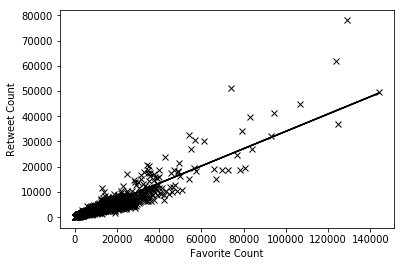

Line Equation: Retweets = (0.34354021352659503)*Favorites +-315.82907059839135
Line of Best Fit Correlation: 0.9170767967001244


In [513]:
x, y = popularity.favorite_count, popularity.retweet_count
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = x*slope + intercept
tweet_popularity = plt.plot(x,y, 'x', x, line, color = 'black')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.show()

print('Line Equation: Retweets = ({})*Favorites +{}'.format(slope,intercept))
print('Line of Best Fit Correlation: {}'.format(r_value))

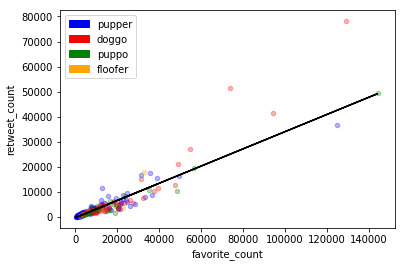

In [517]:
# Create database for each dog category ignoring mutliple classifications
floofer_df = popularity[popularity['dog_category'] == 'floofer']
puppers_df = popularity[popularity['dog_category'] == 'pupper']
puppo_df = popularity[popularity['dog_category'] == 'puppo']
doggo_df = popularity[popularity['dog_category'] == 'doggo']
none_df = popularity[popularity['dog_category'] == 'None']

plt2 = puppers_df.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', alpha=0.3)
doggo_df.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=plt2, alpha=0.3)
floofer_df.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', ax=plt2, alpha=0.3)
puppo_df.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=plt2, alpha=0.3)

puppers = mpatches.Patch(label='pupper', color = 'Blue')
doggo = mpatches.Patch(label='doggo', color = 'Red')
puppo = mpatches.Patch(label='puppo', color = 'Green')
floofer = mpatches.Patch(label='floofer', color = 'Orange')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='black')

plt.show()

## Correlation between favorites and ratings (Popularity dataset)

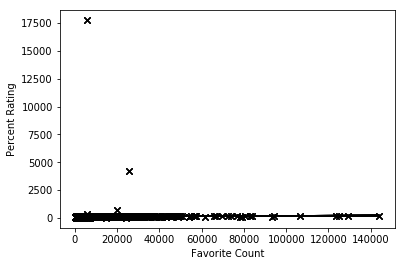

Line Equation: Percent_Rating = (0.0007428734922200771)*Favorites +110.32738325419213
Line of Best Fit Correlation: 0.023049899951526207


In [526]:
x1, y1 = popularity.favorite_count, popularity.percent_rating
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1,y1)
line1 = x1*slope1 + intercept1
rating_relation = plt.plot(x1,y1, 'x', x1, line1, color = 'black')
plt.xlabel('Favorite Count')
plt.ylabel('Percent Rating')
plt.show()

print('Line Equation: Percent_Rating = ({})*Favorites +{}'.format(slope1,intercept1))
print('Line of Best Fit Correlation: {}'.format(r_value1))

# Retweet correlation with Percent_Rating even worse

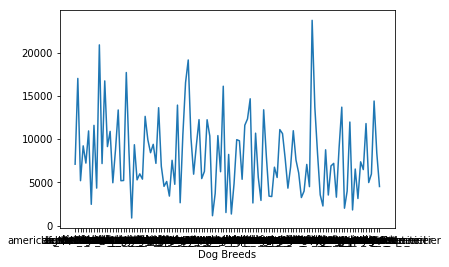

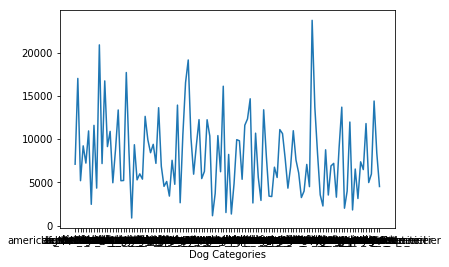

In [527]:
# dog breed vs favorites
dbfc = twitter_clean_df.groupby('p0').favorite_count.mean()
plt.xlabel('Dog Breeds')
plt.plot(dbfc)
plt.show()
dbfc.to_csv('dbfc.csv')
# dog category vs favorite
dcfc = twitter_clean_df.groupby('dog_category').favorite_count.mean()
plt.xlabel('Dog Categories')
plt.plot(dbfc)
plt.show()
dcfc.to_csv('dcfc.csv')

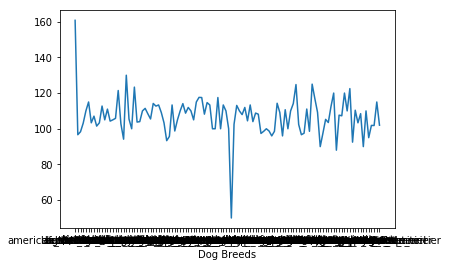

In [528]:
dbpr = twitter_clean_df.groupby('p0').percent_rating.mean()
plt.xlabel('Dog Breeds')
plt.plot(dbpr)
plt.show()
dbpr.to_csv('dbpr.csv')

## Most Tweeted Dog Breed vs Rating

In [466]:
golden_retriever = twitter_clean_df[twitter_clean_df['p0'] == 'golden_retriever']
labrador_retriever = twitter_clean_df[twitter_clean_df['p0'] == 'labrador_retriever']
pembroke = twitter_clean_df[twitter_clean_df['p0'] == 'pembroke']
chow = twitter_clean_df[twitter_clean_df['p0'] == 'chow']
chihuahua = twitter_clean_df[twitter_clean_df['p0'] == 'chihuahua']
samoyed = twitter_clean_df[twitter_clean_df['p0'] == 'samoyed']
french_bulldog = twitter_clean_df[twitter_clean_df['p0'] == 'french_bulldog']
cocker_spaniel = twitter_clean_df[twitter_clean_df['p0'] == 'cocker_spaniel']
malamute = twitter_clean_df[twitter_clean_df['p0'] == 'malamute']
german_shepherd = twitter_clean_df[twitter_clean_df['p0'] == 'german_shepherd']
pug = twitter_clean_df[twitter_clean_df['p0'] == 'pug']
toy_poodle = twitter_clean_df[twitter_clean_df['p0'] == 'toy_poodle']
pomeranian = twitter_clean_df[twitter_clean_df['p0'] == 'pomeranian']

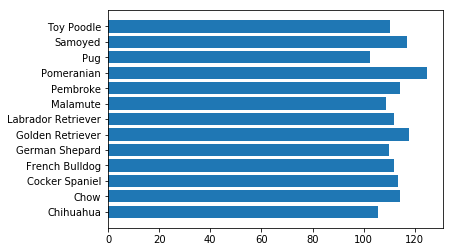

In [529]:
golden_retriever_rating = np.mean(golden_retriever.percent_rating)
labrador_retriever_rating = np.mean(labrador_retriever.percent_rating)
pembroke_rating = np.mean(pembroke.percent_rating)
chow_rating = np.mean(chow.percent_rating)
chihuahua_rating = np.mean(chihuahua.percent_rating)
samoyed_rating = np.mean(samoyed.percent_rating)
french_bulldog_rating = np.mean(french_bulldog.percent_rating)
cocker_spaniel_rating = np.mean(cocker_spaniel.percent_rating)
malamute_rating = np.mean(malamute.percent_rating)
german_shepherd_rating = np.mean(german_shepherd.percent_rating)
pug_rating = np.mean(pug.percent_rating)
toy_poodle_rating = np.mean(toy_poodle.percent_rating)
pomeranian_rating = np.mean(pomeranian.percent_rating)

x2=['Golden Retriever','Labrador Retriever','Pembroke','Chow','Chihuahua','Samoyed','French Bulldog','Cocker Spaniel','Malamute','German Shepard','Pug','Toy Poodle','Pomeranian']
y2=[golden_retriever_rating,labrador_retriever_rating,pembroke_rating,chow_rating,chihuahua_rating,samoyed_rating,french_bulldog_rating,cocker_spaniel_rating,malamute_rating,german_shepherd_rating,pug_rating,toy_poodle_rating,pomeranian_rating]
plt.barh(x2,y2)
plt.show()

# Are differences between rating by dog breed
# Most tweeted about dogs do not have rating

## Dog Category vs Rating

In [530]:
floofer_adf = twitter_clean_df[twitter_clean_df['dog_category'] == 'floofer']
pupper_adf = twitter_clean_df[twitter_clean_df['dog_category'] == 'pupper']
puppo_adf = twitter_clean_df[twitter_clean_df['dog_category'] == 'puppo']
doggo_adf = twitter_clean_df[twitter_clean_df['dog_category'] == 'doggo']
none_adf = twitter_clean_df[twitter_clean_df['dog_category'] == 'None']

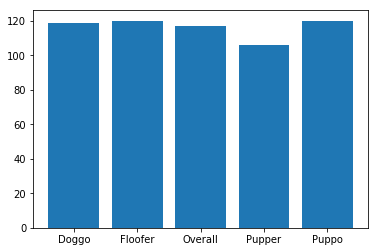

In [531]:
overall_rating = np.mean(twitter_clean_df.percent_rating)
floofer_rating = np.mean(floofer_adf.percent_rating)
pupper_rating = np.mean(pupper_adf.percent_rating)
puppo_rating = np.mean(puppo_adf.percent_rating)
doggo_rating = np.mean(doggo_adf.percent_rating)

x3=['Overall','Floofer','Pupper','Puppo','Doggo']
y3=[overall_rating,floofer_rating,pupper_rating,puppo_rating,doggo_rating]
plt.bar(x3,y3)
plt.show()
# Not much difference in the average rating by dog category